In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
swissDF  = pd.read_csv("swiss_reviews.csv")

One of the first thing we'll need to do is transform the categories, which are a string right now, into a list of string.

In [3]:
def transformToList(x):
    newList=[]
    for i in range(1, len(x)):
        if i%2 != 0 :
            newList.append(x[i])
    return newList


swissDF['categories'] = swissDF['categories'].apply(lambda x: x.split("'"))
swissDF['categories'] = swissDF['categories'].apply(lambda x : transformToList(x))

In [4]:
swissDF.drop('Unnamed: 0', axis=1, inplace=True)
swissDF.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,brand,categories
0,B000R9AAJA,"[0, 0]",5.0,Speakers are loud and clear. They work great! ...,"11 22, 2012",A0023922YYT81KP1CWU4,Steven Caruso,Great!,1353542400,Logitech,"[Electronics, Computers & Accessories, Cables ..."
1,B000R9AAJA,"[1, 1]",5.0,These I bought for my co-worker who always bor...,"02 3, 2014",A034570920WVP7XFWHZ5I,Olyvia,Co-Worker is happy,1391385600,Logitech,"[Electronics, Computers & Accessories, Cables ..."
2,B000R9AAJA,"[1, 1]",5.0,I bought these speakers for a friend's birthda...,"02 2, 2013",A100FXXJZMM6PI,Phillip Ly,Logitech S-120 Speakers,1359763200,Logitech,"[Electronics, Computers & Accessories, Cables ..."
3,B000R9AAJA,"[1, 1]",5.0,My brother bought this speaker set for me back...,"10 20, 2012",A10636NGTJRUHN,sande276,Great!,1350691200,Logitech,"[Electronics, Computers & Accessories, Cables ..."
4,B000R9AAJA,"[1, 1]",5.0,I have had these for a while and they work lik...,"01 31, 2013",A1071EF3JDBGI0,"R. Lorente ""Picky""",EXCELLENT!,1359590400,Logitech,"[Electronics, Computers & Accessories, Cables ..."


We'll first look at the overall ratings, all categories mixed together

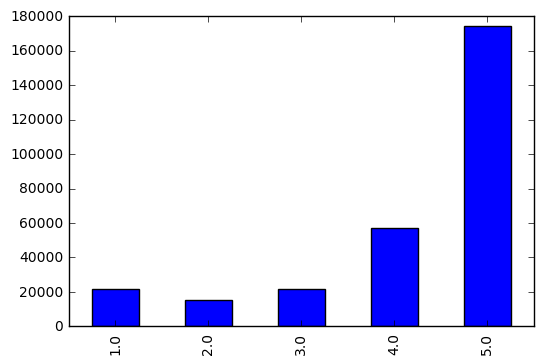

In [5]:
swissDF.overall.value_counts().sort_index().plot.bar()

The ratings are pretty high, but as we have determined before this is also the case for international products. So basing our observations on raw evaluations isn't enough, we'll try to separate them by categories and perform sentiment analysis

In [6]:
swissDF['year'] = swissDF['reviewTime'].astype(str)
swissDF['year'] = swissDF['year'].apply(lambda x: x[-4:])

In [7]:
yearGroup =swissDF.groupby(['year'])
yearGroup['overall'].agg(['count', 'mean'])

,count,mean
year,,
2000,12,4.416667
2001,49,3.918367
2002,70,3.942857
2003,205,4.136585
2004,307,3.491857
2005,826,3.984262
2006,1893,4.078711
2007,5514,4.273486
2008,7366,4.250068


The mean seems pretty consistent. with a few exceptions like 2004 which is probably due to a very inpopular product released back then. It also seems like the number of reviews is increasing exponentially.

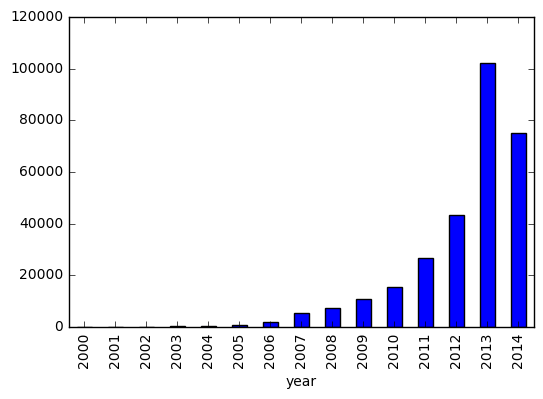

In [8]:
yearGroup['overall'].count().plot.bar()

2014 might seem smaller than 2013, but this data was collected in July 2014 which explains it.

We will now look at the dsitribution of reviews among swiss brands. Because some of them are much more popular than others (logitech being the most popular one) we will plot it using a logarithmic scale

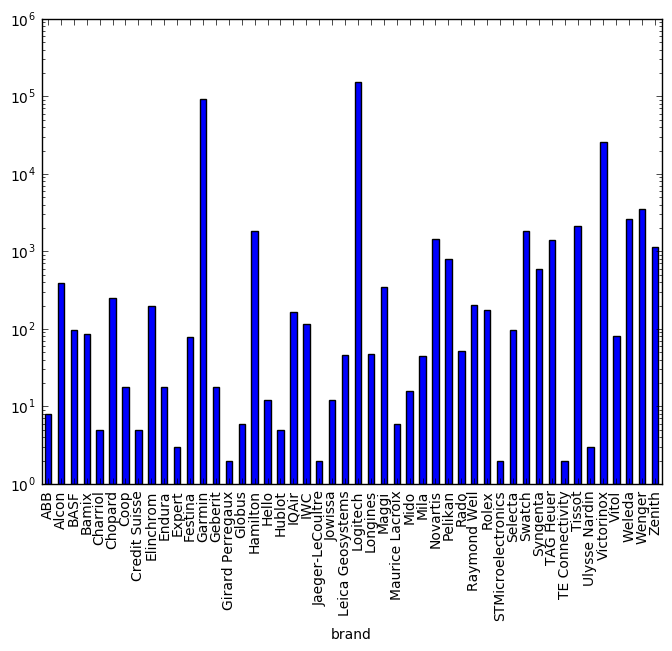

In [9]:
swissDF.groupby(['brand'])['brand'].count().plot.bar(log=True, figsize=(8, 6))

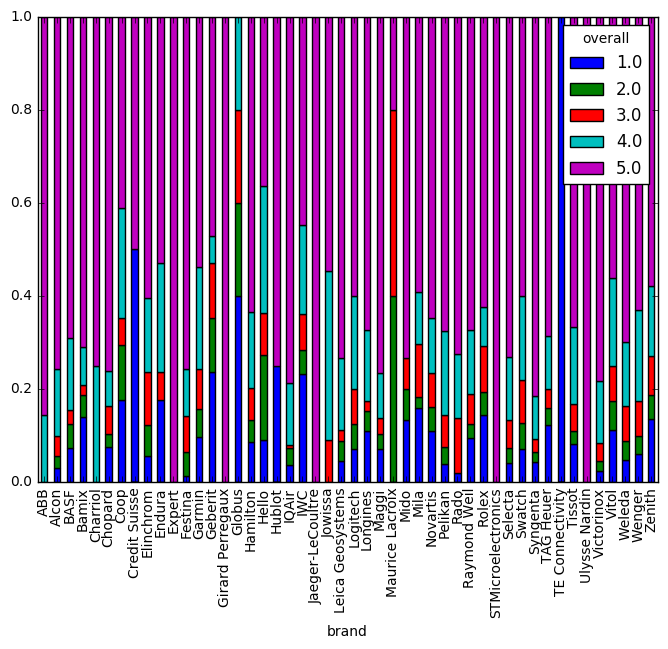

In [15]:
brandScore = swissDF.groupby(['brand', 'overall'])['brand']
brandScore = brandScore.count().unstack('overall')
brandScore.div(brandScore.sum(1), 0).plot(kind='bar', stacked=True, figsize=(8,6))
#problem here, the ratings are also put on a log scale so it seems like there are too many 1s. We could try to fix it or replace
#by piecharts

We will now group the reviews by category

In [21]:
categoriesCount = pd.DataFrame(swissDF['categories'].tolist()).stack().value_counts()
categoriesCount

Electronics                        218203
Computers & Accessories            116378
Cables & Accessories                94113
GPS & Navigation                    75883
Clothing, Shoes & Jewelry           45919
Vehicle GPS                         35114
Mice                                34120
Sports & Handheld GPS               27265
Sports & Outdoors                   22381
Accessories                         20312
Trucking GPS                        18019
Keyboards                           17910
Computer Speakers                   15715
Accessories & Supplies              14218
Audio & Video Accessories           13939
Running GPS Units                   13849
Remote Controls                     13794
Outdoor Gear                        11784
Camping & Hiking                    11764
Knives & Tools                      11745
GPS System Accessories              11507
TV Remote Controls                  11079
Folding Knives                      10973
Handheld GPS Units                

Let's focus on the most reviewed categories

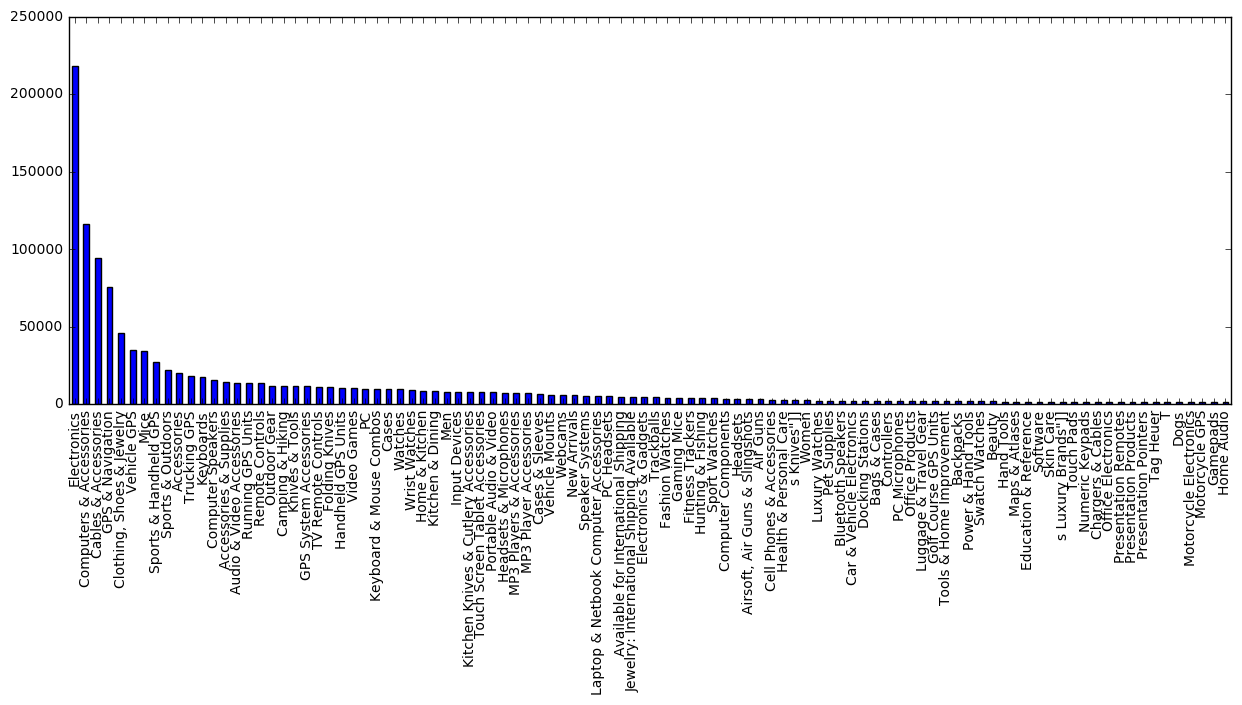

In [43]:
categoriesCount = categoriesCount.head(100)
categoriesCount.plot.bar(figsize=(15,5))

We will now take a look at how well rated each of these categories are

In [28]:
categoriesCount.keys()

Index(['Electronics', 'Computers & Accessories', 'Cables & Accessories',
       'GPS & Navigation', 'Clothing, Shoes & Jewelry', 'Vehicle GPS', 'Mice',
       'Sports & Handheld GPS', 'Sports & Outdoors', 'Accessories',
       'Trucking GPS', 'Keyboards', 'Computer Speakers',
       'Accessories & Supplies', 'Audio & Video Accessories',
       'Running GPS Units', 'Remote Controls', 'Outdoor Gear',
       'Camping & Hiking', 'Knives & Tools', 'GPS System Accessories',
       'TV Remote Controls', 'Folding Knives', 'Handheld GPS Units',
       'Video Games', 'PC', 'Keyboard & Mouse Combos', 'Cases', 'Watches',
       'Wrist Watches', 'Home & Kitchen', 'Kitchen & Dining', 'Men',
       'Input Devices', 'Kitchen Knives & Cutlery Accessories',
       'Touch Screen Tablet Accessories', 'Portable Audio & Video',
       'Headsets & Microphones', 'MP3 Players & Accessories',
       'MP3 Player Accessories', 'Cases & Sleeves', 'Vehicle Mounts',
       'Webcams', 'New Arrivals', 'Speaker Systems

In [45]:
a = swissDF['Electronics' in swissDF['categories']]

KeyError: 'Level Electronics must be same as name (None)'